In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Chaotic map Functions

In [2]:
def logistic(r, x):
    return r * x * (1 - x)
        
def sine(r,x):
    return r * math.sin(math.pi * x) / 4

def tent(r,x):
    if x<0.5:
        return r * x / 2
    else:
        return r * (1-x) /2

In [3]:
def cls(r,x):
    return ((r * x * (1 - x)) + ((4-r) * math.sin(math.pi * x) *0.25))%100

In [4]:
def clt(r,x):
    if x<0.5:
        return ((r*0.002*x*(1-x))+((r*x)/0.002))%1
    return ((r*0.002*x*(1-x))+((r*(1-x)/0.002)))%1

# Bifurcation diagram

In [5]:
def Bifurcation_diagram(func,x0,Npre,Nplot,steps=0.005,r_min=0):
    R=[]
    X=[]
    r_range=np.linspace(r_min,4,int(1/steps))
    for r in r_range:
        x=x0;
        for i in range(Npre+Nplot+1):
            if i>=Npre:
                X.append(x)
                R.append(r)
            x=func(r,x)
            #print(r)
    
    plt.plot(R,X,ls='',marker=',')
    plt.axis([r_min,4,0,1])
    plt.xlabel('r')
    plt.ylabel('x_n')
    plt.show()
    #return R,X

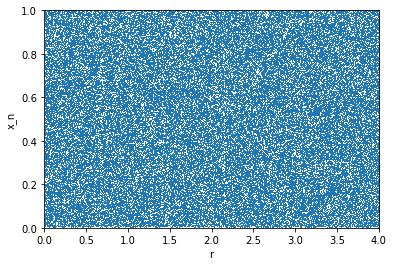

In [6]:
Bifurcation_diagram(clt,0.6,200,100,0.001)

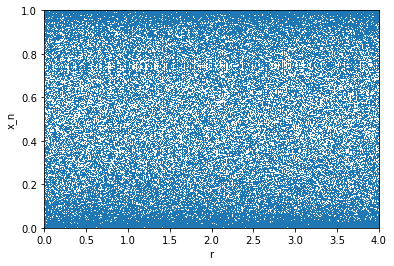

In [7]:
Bifurcation_diagram(cls,0.6,200,100,0.001)

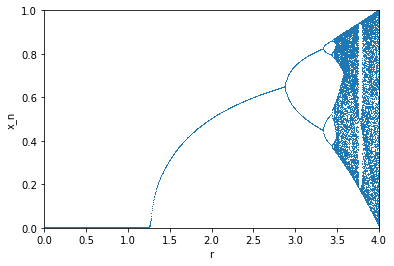

In [8]:
Bifurcation_diagram(sine,0.5,200,100,0.001)

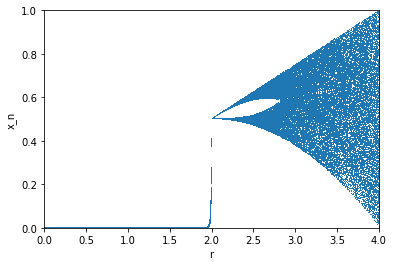

In [9]:
Bifurcation_diagram(tent,0.5,200,100,0.001)

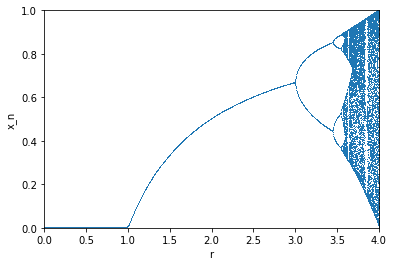

In [10]:
Bifurcation_diagram(logistic,0.5,200,100,0.001)

# Neural Network

In [6]:
import random
import numpy as np

In [12]:
def cubic(r, x):
    return r * x * (1 - (x*x))

def clsine(r,x):
        return ((r * x * (1 - x)) + ((4-r) * math.sin(math.pi * x) *0.25))%100
    
def clt(r,x):
    if x<0.5:
        return ((r*0.002*x*(1-x))+((r*x)/0.002))%1
    return ((r*0.002*x*(1-x))+((r*(1-x)/0.002)))%1

In [2]:
def inputKey(X):
    for i in range(64):
        X.append(random.randint(0, 1))
        
    return X

In [14]:
def Zo():
    S=[]
    for i in range(4):
        Si=""
        for i in range(16):
            x=random.randint(0, 1)
            Si+=str(x)
        
        S.append(int(Si,2))
        #print(Si)
        
    x=0
    for i in S:
        x+=(i/pow(2,16))
        
    return x%1

In [16]:
def activationFx(r,x,i):
    if(i&1):
        return clsine(r,x)
    return clt(r,x)

In [17]:
def Q_b(x):
    return (3.58+(0.42*x))

In [18]:
def Tb(x):
    return ((round(x*pow(10,4))%100)+1)

In [19]:
class Layer_Dense:
    
    def __init__(self,n_inputs,n_neurons):
        self.n_input=n_inputs
        self.n_neurons=n_neurons
        self.create_weights()
        self.create_biases()
        self.control_parameter()
    
    def create_weights(self):
        Nplot=self.n_input*self.n_neurons
        X=[]
        x=Zo()
        Npre=1000
        for i in range(Npre+Nplot):
            if i>=Npre:
                X.append(x)
            x=cubic(2.59,x)
        
        weights=np.array(X)
        self.weights=np.reshape(weights,(-1,self.n_neurons))
        self.biases=np.zeros((1,self.n_neurons))
        
    def create_biases(self):
        pass
    
    def control_parameter(self):
        pass
        
    def forward(self,inputs,Layer):
        XW=np.dot(inputs,self.weights)+self.biases
        Tb_Vector=Tb(inputs)
        self.output=activationFx(self.Q,XW,Layer)
        self.Q=Q_b(self.output)
        for i in Tb_Vector:
            for j in range(i):
                self.output=activationFx(self.Q,XW,Layer)
                self.Q=Q_b(self.output)
                
                
        

In [20]:
Hidden_layer1=Layer_Dense(64,32)
Hidden_layer2=Layer_Dense(32,16)
Hidden_layer3=Layer_Dense(16,8)
Output_layer=Layer_Dense(8,4)

In [21]:
Zo()

0.0167388916015625

In [22]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

In [3]:
class Layer_Dense:
    
    def __init__(self,n_inputs,n_neurons):
        np.random.seed(0)
        self.n_input=n_inputs
        self.n_neurons=n_neurons
        self.create_weights()
        self.create_biases()
    
    def create_weights(self):
        self.weights=0.1*np.random.rand(self.n_input,self.n_neurons)
        
        
    def create_biases(self):
        self.biases=np.zeros((1,self.n_neurons))
        
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases
        

In [4]:
class Activation_sigmoid:
    def forward(self,inputs):
        self.output=1/(1 + np.exp(-inputs))

In [13]:
X=[]
X=inputKey(X)
X=np.array(X)

In [14]:
print(X)

[0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0]


In [15]:
Hidden_layer1=Layer_Dense(64,32)
Activation1=Activation_sigmoid()
Output_layer=Layer_Dense(32,3) # 3output iterate 65536 
Activation2=Activation_sigmoid()

In [16]:
Hidden_layer1.forward(X)
Activation1.forward(Hidden_layer1.output)
Output_layer.forward(Activation1.output)
Activation2.forward(Output_layer.output)
Enc=[]
Enc=Activation2.output
Enc=np.array(Enc)

In [17]:
print(Enc)

[[0.7705237  0.76872028 0.80100588]]


# Import Library

In [1]:
from PIL import Image
from IPython.display import display
import tkinter as tk
from tkinter import filedialog
import hashlib 
import binascii
import textwrap
import cv2
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from importlib import reload  
from bisect import bisect_left as bsearch
import qrng
import math
from skimage import io
%matplotlib inline

# Quantam Random Number Generator

In [2]:
def generate_rn():
    qrng.set_provider_as_IBMQ('')
    qrng.set_backend()
    return qrng.get_random_float(0,1)

In [ ]:
E1=[]
for i in range(65536*3):
    x=generate_rn()
    E1.append(x)

E1=np.array(E1)

In [34]:
E2=[]
for i in range(65536):
    x=generate_rn()
    E2.append(x)

E2=np.array(E2)

In [35]:
E3=[]
for i in range(65536):
    x=generate_rn()
    E3.append(x)

E3=np.array(E3)

In [36]:
E4=[]
for i in range(65536):
    x=generate_rn()
    E4.append(x)

E4=np.array(E4)

In [37]:
E1=E1.reshape(-1)

In [39]:
E2=E2.reshape(-1)
E3=E3.reshape(-1)
E4=E4.reshape(-1)
Enc=Enc.reshape(-1)

In [4]:
np.save('Enc_E1.npy',E1)
np.save('Enc_E2.npy',E2)
np.save('Enc_E3.npy',E3)
np.save('Enc_E4.npy',E4)
np.save('Enc_NN.npy',Enc)

NameError: name 'E1' is not defined

In [2]:
E1=np.load('Enc_E1.npy')
E1=E1[:65536]
E2=np.load('Enc_E2.npy')
E3=np.load('Enc_E3.npy')
E4=np.load('Enc_E4.npy')

In [20]:
print(E2[0],E3[0],E4[0])
print(E2[1],E3[1],E4[1])

0.24815750122070312 0.7835439443588257 0.8859827518463135
0.31176328659057617 0.6537460088729858 0.4950413703918457


# Image Selection

In [2]:
def image_selector():                           
    path = "NULL"
    root = tk.Tk()
    root.withdraw()                             
    path = filedialog.askopenfilename()         
    if path!="NULL":
        print("Image loaded!") 
    else:
        print("Error Image not loaded!")
    return path

# Decomposition

In [4]:
def split_into_rgb_channels(image):
    b,g,r = cv2.split(image)
    return b, g, r

In [5]:
def decompose_matrix(iname):
    image = cv2.imread(iname)
    blue,green,red = split_into_rgb_channels(image)
    for values, channel in zip((red, green, blue), (2,1,0)):
        img = np.zeros((values.shape[0], values.shape[1]), dtype = np.uint8)
        img[:,:] = (values)
        if channel == 0:
            B = np.asmatrix(img)
        elif channel == 1:
            G = np.asmatrix(img)
        else:
            R = np.asmatrix(img)
    return B,G,R

# Pixel Permutation

In [6]:
def pixel_permutation(iname,E1):
    IrgbH=iname.reshape(-1)
    indx = [i[0] for i in sorted(enumerate(E1), key=lambda x:x[1])]
    IrgbH_new = IrgbH[np.ix_(indx)]
    IrgbH_new= np.reshape(IrgbH_new, (256, 256))
    return IrgbH_new

In [7]:
def permute(b,g,r,E1):
    blue=pixel_permutation(b,E1)
    green=pixel_permutation(g,E1)
    red=pixel_permutation(r,E1)
    return blue,green,red

# Normalize

In [8]:
def normalize(X,mod,c):
    m=X.shape
    return ((np.round(X*pow(10,4)))%mod) + c*np.ones(m) 

# Key Generation

In [9]:
def key_generation(X):
    E2_n=normalize(X,256,0)
    E2_n=np.array(E2_n)
    E2_n =E2_n.astype('int32')
    #E2_n = np.reshape(E2_n, (256, 256))
    E2_n=E2_n.reshape(-1)
    return E2_n

# DNA Encoding

In [10]:
def Dna_encoding(A,num):
    t=len(A)
    fv=np.zeros((t,),dtype = str)
    for k in range(t):
        if num[k]==1 or num[k]==2:
            if A[k]==0:
                fv[k]='A'
            elif A[k]==3:
                fv[k]='T'
            elif A[k]==2:
                if num[k]==1:
                    fv[k]='C'
                else:
                    fv[k]='G'
            else:
                if num[k]==1:
                    fv[k]='G'
                else:
                    fv[k]='C'

        elif num[k]==3 or num[k]==4:
            if A[k]==1:
                fv[k]='A'
            elif A[k]==2:
                fv[k]='T'
            elif A[k]==0:
                if num[k]==3:
                    fv[k]='G'
                else:
                    fv[k]='C'
            else:
                if num[k]==3:
                    fv[k]='C'
                else:
                    fv[k]='G'

        elif num[k]==5 or num[k]==6:
            if A[k]==2:
                fv[k]='A'
            elif A[k]==1:
                fv[k]='T'
            elif A[k]==0:
                if num[k]==5:
                    fv[k]='G'
                else:
                    fv[k]='C'
            else:
                if num[k]==5:
                    fv[k]='C'
                else:
                    fv[k]='G'

        else:                    #  num==7 || num==8
            if A[k]==3:
                fv[k]='A'
            elif A[k]==0:
                fv[k]='T'
            elif A[k]==1:
                if num[k]==7:
                    fv[k]='G'
                else:
                    fv[k]='C'
            else:
                if num[k]==7:
                    fv[k]='C'
                else:
                    fv[k]='G'
    return fv

In [11]:
def pair_dna(A,num):
    a1=np.bitwise_and(A,192)/64
    a2=np.bitwise_and(A,48)/16
    a3=np.bitwise_and(A,12)/4
    a4=np.bitwise_and(A,3)
    a1=a1.reshape(-1)
    a2=a2.reshape(-1)
    a3=a3.reshape(-1)
    a4=a4.reshape(-1)
    a1_dna=Dna_encoding(a1,num)
    a2_dna=Dna_encoding(a2,num)
    a3_dna=Dna_encoding(a3,num)
    a4_dna=Dna_encoding(a4,num)
    X=np.array([a1_dna,a2_dna,a3_dna,a4_dna])
    return X

In [12]:
def encode(blue,green,red,key,E1,E2):
    E_1=normalize(E1,8,1)
    E_2=normalize(E2,8,1)
    blue_dna=pair_dna(blue,E_1)
    green_dna=pair_dna(green,E_1)
    red_dna=pair_dna(red,E_1)
    key_dna=pair_dna(key,E_2)
    return blue_dna,green_dna,red_dna,key_dna

# DNA Operation

In [13]:
#Subfunctions DNA operations arr1 and arr2 represent two DNA matrices to be operated.
#When num is 0, it means to add; when num is 1, it means to subtract; when num is 2, it means XOR; when num is 3, it means XOR
def DNA_operation(arr1,arr2,num):
    t=len(arr1)
    fv=np.zeros((t,),dtype = str)        #Pre-allocated memory
    for i in range(t):
        if num[i]==0:                #add
            if arr1[i]=='A':
                fv[i]=arr2[i]
            elif arr1[i]=='T':
                if arr2[i]=='A':
                    fv[i]='T'
                elif arr2[i]=='T':
                    fv[i]='C'
                elif arr2[i]=='C':
                    fv[i]='G'
                else:
                    fv[i]='A'
            elif arr1[i]=='C':
                if arr2[i]=='A':
                    fv[i]='C'
                elif arr2[i]=='T':
                    fv[i]='G'
                elif arr2[i]=='C':
                    fv[i]='A'
                else:
                    fv[i]='T'
            else:
                if arr2[i]=='A':
                    fv[i]='G'
                elif arr2[i]=='T':
                    fv[i]='A'
                elif arr2[i]=='C':
                    fv[i]='T'
                else:
                    fv[i]='C'

        elif num[i]==1:                  #Subtraction
            if arr2[i]=='A':
                fv[i]=arr1[i]
            elif arr2[i]=='T':
                if arr1[i]=='A':
                    fv[i]='G'
                elif arr1[i]=='T':
                    fv[i]='A'
                elif arr1[i]=='C':
                    fv[i]='T'
                else:
                    fv[i]='C'
            elif arr2[i]=='C':
                if arr1[i]=='A':
                    fv[i]='C'
                elif arr1[i]=='T':
                    fv[i]='G'
                elif arr1[i]=='C':
                    fv[i]='A'
                else:
                    fv[i]='T'
            else:
                if arr1[i]=='A':
                    fv[i]='T'
                elif arr1[i]=='T':
                    fv[i]='C';
                elif arr1[i]=='C':
                    fv[i]='G'
                else:
                    fv[i]='A'
        elif num[i]==2:        #XOR
            if arr1[i]==arr2[i]:
                fv[i]='C'
            elif (arr1[i]=='T' and arr2[i]=='A') or (arr1[i]=='A' and arr2[i]=='T') or (arr1[i]=='G' and arr2[i]=='C') or (arr1[i]=='C' and arr2[i]=='G'):
                fv[i]='G'
            elif (arr1[i]=='C' and arr2[i]=='A') or (arr1[i]=='A' and arr2[i]=='C') or (arr1[i]=='G' and arr2[i]=='T') or (arr1[i]=='T' and arr2[i]=='G'):
                fv[i]='A'
            else:
                fv[i]='T'

        else:                #%same xor
            if arr1[i]==arr2[i]:
                fv[i]='A'
            elif (arr1[i]=='T' and arr2[i]=='A') or (arr1[i]=='A' and arr2[i]=='T') or (arr1[i]=='G' and arr2[i]=='C') or (arr1[i]=='C' and arr2[i]=='G'):
                fv[i]='T'
            elif (arr1[i]=='C' and arr2[i]=='A') or (arr1[i]=='A' and arr2[i]=='C') or (arr1[i]=='G' and arr2[i]=='T') or (arr1[i]=='T' and arr2[i]=='G'):
                fv[i]='C'
            else:
                fv[i]='G'
    
    return fv


In [14]:
def pair_operation(X,Y,Z):
    I1=DNA_operation(X[0,:],Y[0,:],Z)
    I2=DNA_operation(X[1,:],Y[1,:],Z)
    I3=DNA_operation(X[2,:],Y[2,:],Z)
    I4=DNA_operation(X[3,:],Y[3,:],Z)
    A=np.array([I1,I2,I3,I4])
    
    return A

In [15]:
def operation(blue,green,red,key,E3):
    E_3=normalize(E3,4,0)
    I_Bo=pair_operation(blue,key,E_3)
    I_Go=pair_operation(green,key,E_3)
    I_Ro=pair_operation(red,key,E_3)
    return I_Bo,I_Go,I_Ro

# DNA Decoding

In [16]:
# Sub-function DNA decoding
def DNA_decoding(array,num):
    t=len(array)
    A=np.zeros((t,))        #Pre-allocated memory
   
    for i in range(t):
        if num[i]==1 or num[i]==2:
            if array[i]=='A':
                A[i]=0
            elif array[i]=='T':
                A[i]=3
            elif array[i]=='G':
                if num[i]==1:
                    A[i]=1
                else:
                    A[i]=2
            else:
                if num[i]==1:
                    A[i]=2
                else:
                    A[i]=1
        elif num[i]==3 or num[i]==4:
            if array[i]=='A':
                A[i]=1
            elif array[i]=='T':
                A[i]=2
            elif array[i]=='G':
                if num[i]==3:
                    A[i]=0
                else:
                    A[i]=3
            else:
                if num[i]==3:
                    A[i]=3
                else:
                    A[i]=0
        elif num[i]==5 or num[i]==6:
            if array[i]=='A':
                A[i]=2
            elif array[i]=='T':
                A[i]=1
            elif array[i]=='G':
                if num[i]==5:
                    A[i]=0
                else:
                    A[i]=3
            else:
                if num[i]==5:
                    A[i]=3
                else:
                    A[i]=0
        else:                    #%  num==7 || num==8
            if array[i]=='A':
                A[i]=3
            elif array[i]=='T':
                A[i]=0;
            elif array[i]=='G':
                if num[i]==7:
                    A[i]=1
                else:
                    A[i]=2
            else:
                if num[i]==7:
                    A[i]=2
                else:
                    A[i]=1
                    
    return A

In [17]:
def pair_decoding(X,Z):
    I1=DNA_decoding(X[0,:],Z)
    I2=DNA_decoding(X[1,:],Z)
    I3=DNA_decoding(X[2,:],Z)
    I4=DNA_decoding(X[3,:],Z)
    A=I1*64+I2*16+I3*4+I4
    return A

In [18]:
def decode(blue,green,red,E4):
    E_4=normalize(E4,8,1)
    I_Bd=pair_decoding(blue,E_4)
    I_Gd=pair_decoding(green,E_4)
    I_Rd=pair_decoding(red,E_4)
    return I_Bd,I_Gd,I_Rd

# Pixel Diffusion Stage

In [19]:
def diffusion(I1,I2,I3,E):
    m,n=I1.shape
    for i in range(m):
        for j in range(1,n):
            I1[i][j]=I1[i][j-1]^I2[i][j]^I3[i][j]^E[i][j]
    
    return I1

In [20]:
def diffuse(blue,green,red,E2,E3,E4):
    E2_n=normalize(E2,256,0)
    E3_n=normalize(E3,256,0)
    E4_n=normalize(E4,256,0)
    I_Bd=blue.astype(int)
    I_Gd=green.astype(int)
    I_Rd=red.astype(int)
    E2_n=E2_n.astype(int)
    E3_n=E3_n.astype(int)
    E4_n=E4_n.astype(int)
    I_bpd = np.bitwise_xor(I_Bd, E4_n)
    I_gpd = np.bitwise_xor(I_Gd, E3_n)
    I_rpd = np.bitwise_xor(I_Rd, E2_n)
    I_rpd=np.reshape(I_rpd, (256, 256))
    I_gpd=np.reshape(I_gpd, (256, 256))
    I_bpd=np.reshape(I_bpd, (256, 256))
    E2_n=np.reshape(E2_n, (256, 256))
    E3_n=np.reshape(E3_n, (256, 256))
    E4_n=np.reshape(E4_n, (256, 256))
    I_Rd=np.reshape(I_Rd, (256, 256))
    I_Gd=np.reshape(I_Gd, (256, 256))
    I_Bd=np.reshape(I_Bd, (256, 256))
    I_Rdi=diffusion(I_rpd,I_Rd,I_Gd,E2_n)
    I_Gdi=diffusion(I_gpd,I_Gd,I_Bd,E3_n)
    I_Bdi=diffusion(I_bpd,I_Bd,I_Rd,E4_n)
    return I_Bdi,I_Gdi,I_Rdi

In [22]:
def diffuse_new(blue,green,red,E2,E3,E4):
    E2_n=normalize(E2,256,0)
    E3_n=normalize(E3,256,0)
    E4_n=normalize(E4,256,0)
    I_Bd=blue.astype(int)
    I_Gd=green.astype(int)
    I_Rd=red.astype(int)
    E2_n=E2_n.astype(int)
    E3_n=E3_n.astype(int)
    E4_n=E4_n.astype(int)
    E2_n=E2_n.reshape(-1)
    E3_n=E3_n.reshape(-1)
    E4_n=E4_n.reshape(-1)
    I_Rd=I_Rd.reshape(-1)
    I_Gd=I_Gd.reshape(-1)
    I_Bd=I_Bd.reshape(-1)
    I_bpd = np.bitwise_xor(I_Bd, E4_n)
    I_gpd = np.bitwise_xor(I_Gd, E3_n)
    I_rpd = np.bitwise_xor(I_Rd, E2_n)
    I_rpd=np.reshape(I_rpd, (256, 256))
    I_gpd=np.reshape(I_gpd, (256, 256))
    I_bpd=np.reshape(I_bpd, (256, 256))
    E2_n=np.reshape(E2_n, (256, 256))
    E3_n=np.reshape(E3_n, (256, 256))
    E4_n=np.reshape(E4_n, (256, 256))
    I_Rd=np.reshape(I_Rd, (256, 256))
    I_Gd=np.reshape(I_Gd, (256, 256))
    I_Bd=np.reshape(I_Bd, (256, 256))
    I_Rdi=diffusion(I_rpd,I_Rd,I_Gd,E2_n)
    I_Gdi=diffusion(I_gpd,I_Gd,I_Bd,E3_n)
    I_Bdi=diffusion(I_bpd,I_Bd,I_Rd,E4_n)
    I_Rdi=I_Rdi.reshape(-1)
    I_Gdi=I_Gdi.reshape(-1)
    I_Bdi=I_Bdi.reshape(-1)
    return I_Bdi,I_Gdi,I_Rdi

# Merge

In [21]:
def mergeI(blue,green,red):
    Image = cv2.merge((blue,green,red))
    Image=np.array(Image)
    plt.imshow(Image)
    plt.show()
    return Image

# Execute

Image loaded!
/Users/divyanshusharma/tensorflow-test/1bit_bunglow.png
Original Image


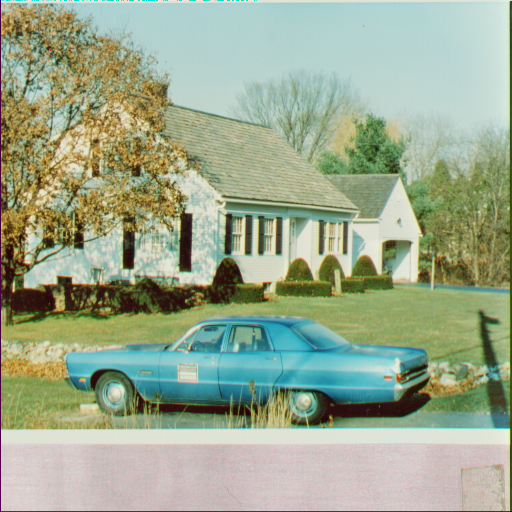

pixels: 262144  width: 512 height: 512 
Image is permuted.....
Image is encoded.....
DNA Operations are performed on Image.....
Image is decoded.....
Pixel Diffusion is performed on Image.....
Encrypted Image


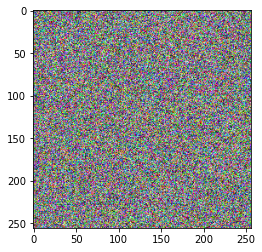

In [126]:
path=image_selector()
print(path)
print("Original Image")
OriginalImage = cv2.imread(path)
display(Image.open(path))
m,n,channel=OriginalImage.shape
print("pixels: {0}  width: {2} height: {1} ".format(m*n, m, n))
blue,green,red = split_into_rgb_channels(OriginalImage)
bluePer,greenPer,redPer = permute(blue,green,red,E1)
print("Image is permuted.....")
key=key_generation(E2)
blueEnc,greenEnc,redEnc,keyEnc=encode(bluePer,greenPer,redPer,key,E1,E2)
print("Image is encoded.....")
blueOpe,greenOpe,redOpe=operation(blueEnc,greenEnc,redEnc,keyEnc,E3)
print("DNA Operations are performed on Image.....")
blueDec,greenDec,redDec=decode(blueOpe,greenOpe,redOpe,E4)
print("Image is decoded.....")
blueDiff,greenDiff,redDiff=diffuse(blueDec,greenDec,redDec,E2,E3,E4)
print("Pixel Diffusion is performed on Image.....")
print("Encrypted Image")
EncImage=mergeI(blueDiff,greenDiff,redDiff)


In [127]:
cv2.imwrite(("Encrypted_bunglow1.png"), EncImage)

True

# Decryption

# Histogram

In [78]:
def histogramOriginal(fname):
    im = cv2.imread(fname)
    im=cv2.resize(im, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    b, bins, patches = plt.hist(im.ravel(), bins = 256,edgecolor='white')
    #b, bins, patches = plt.hist(vals, 255)
    #plt.xlim([0,255])
    #plt.ylim([0,1000])
    plt.show()

In [79]:
def histo1(im):
    im = cv2.imread(im)
    im=cv2.resize(im, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    ax = plt.hist(im.ravel(), bins = 256)
    #b, bins, patches = plt.hist(vals, 255)
    #plt.xlim([0,255])
    #plt.ylim([0,1200])
    plt.show()

In [92]:
EncImagePath=image_selector()
print(EncImagePath)

Image loaded!
/Users/divyanshusharma/tensorflow-test/house.tiff


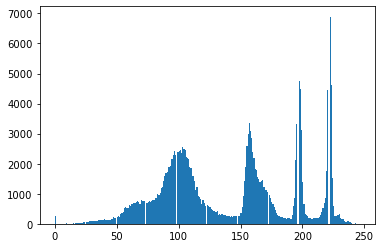

In [93]:
histo1(EncImagePath)

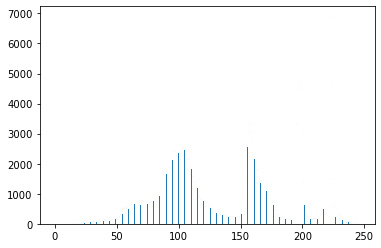

In [94]:
histogramOriginal(EncImagePath)

In [51]:
def plot_histogram(imageFile):
    im = cv2.imread(imageFile)
    # calculate mean value from RGB channels and flatten to 1D array
    vals = im.mean(axis=2).flatten()
    # calculate histogram
    counts, bins = np.histogram(vals, range(257))
    # plot histogram centered on values 0..255
    plt.bar(bins[:-1] -1, counts, width=1, edgecolor='none')
    plt.xlim([-2, 255.5])
    plt.show()

# Chi-Sq

In [95]:
def chi_sq(path):
    img = cv2.imread(path)
    r, c,dim = img.shape
    Max_fq=(r*c)/256
    b,g,r = cv2.split(img)
    blue, binsb, patchesb = plt.hist(b.ravel(), bins = 256,rwidth=0.7,alpha = 0.2)
    green, binsg, patchesg = plt.hist(g.ravel(), bins = 256,rwidth=0.7,alpha = 0.1)
    red, binsr, patchesr = plt.hist(r.ravel(), bins = 256,rwidth=0.7,alpha = 0.3)
    blue=np.array(blue)
    green=np.array(green)
    red=np.array(red)
    bluex=((blue-Max_fq)**2)/Max_fq
    greenx=((green-Max_fq)**2)/Max_fq
    redx=((red-Max_fq)**2)/Max_fq

    X1=np.sum(bluex)
    X2=np.sum(greenx)
    X3=np.sum(redx)
    avg=(X1+X2+X3)/3
    print('RED :',X3)
    print('GREEN :',X2)
    print('BLUE :',X1)
    #print(X1,X2,X3)
    print('AVERAGE :',avg)

In [100]:
EncImagePath=image_selector()
print(EncImagePath)

Image loaded!
/Users/divyanshusharma/tensorflow-test/EncryptedImage/Encrypted_car.png


RED : 233.890625
GREEN : 245.1953125
BLUE : 254.2109375
AVERAGE : 244.43229166666666


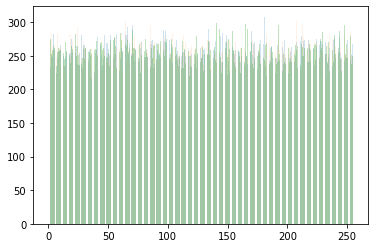

In [101]:
chi_sq(EncImagePath)

# Deviation

In [102]:
def deviation(path):
    I=np.zeros((256,256), dtype=int)
    for i in range(256):
        for j in range(256):
            I[i,j]=j

    I=I.reshape(-1)
    I=np.sort(I)

    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    b=b.reshape(-1)
    g=g.reshape(-1)
    r=r.reshape(-1)
    b=np.sort(b)
    g=np.sort(g)
    r=np.sort(r)
    count=np.zeros((65536,), dtype=int)
    countB=np.zeros((65536,), dtype=int)
    countG=np.zeros((65536,), dtype=int)
    countR=np.zeros((65536,), dtype=int)
    for i in range(len(I)):
        count[i]=(I == i).sum()
        countB[i]=(b == i).sum()
        countG[i]=(g == i).sum()
        countR[i]=(r == i).sum()

    dB=np.absolute(np.array(count) - np.array(countB))
    dG=np.absolute(np.array(count) - np.array(countG))
    dR=np.absolute(np.array(count) - np.array(countR))

    Bval=np.sum(dB)
    Gval=np.sum(dG)
    Rval=np.sum(dR)

    devB=Bval/(256*256)
    devG=Gval/(256*256)
    devR=Rval/(256*256)
    #print(devB,devG,devR)
    print('RED :',devR)
    print('GREEN :',devG)
    print('BLUE :',devB)

In [105]:
deviation('/Users/divyanshusharma/tensorflow-test/EncryptedImage/Encrypted_baboon.png')

RED : 0.04754638671875
GREEN : 0.047088623046875
BLUE : 0.052337646484375


# Intensity

In [147]:
imO=cv2.imread('3T6Gc.jpeg')

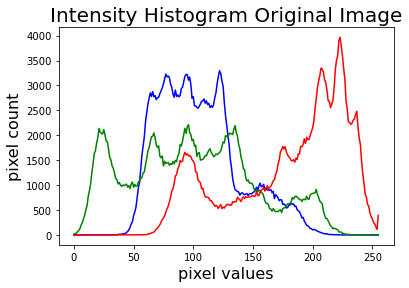

In [148]:
histogram_blue = cv2.calcHist([imO],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([imO],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([imO],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

In [109]:
im = cv2.imread('Encrypted3T6Gc_.png')

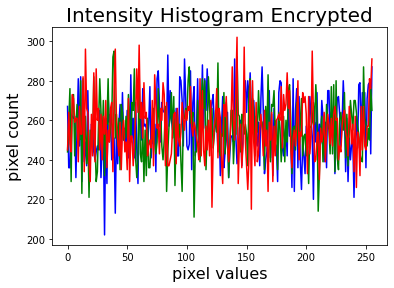

In [110]:
histogram_blue = cv2.calcHist([im],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([im],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([im],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

# Entropy

In [106]:
def entropy(imageFile):
    im = Image.open(imageFile)
    rgbHistogram = im.histogram()
    print('Snannon Entropy for Red, Green, Blue:')
    for rgb in range(1):
         totalPixels = sum(rgbHistogram[rgb * 256 : (rgb + 1) * 256])
         ent = 0.0
         for col in range(rgb * 256, (rgb + 1) * 256):
             freq = float(rgbHistogram[col]) / totalPixels
             if freq > 0:
                 ent = ent + freq * math.log(freq, 2)
         ent = -ent
         print(ent)

In [113]:
x=entropy('/Users/divyanshusharma/tensorflow-test/EncryptedImage/Encrypted_baboon.png')

Snannon Entropy for Red, Green, Blue:
7.9972986534478245


In [114]:
x=entropy('/Users/divyanshusharma/tensorflow-test/EncryptedImage/Encrypted_bunglow.png')

Snannon Entropy for Red, Green, Blue:
7.997743592938521


In [115]:
x=entropy('/Users/divyanshusharma/tensorflow-test/EncryptedImage/Encrypted_car.png')

Snannon Entropy for Red, Green, Blue:
7.997428902427262


In [116]:
x=entropy('/Users/divyanshusharma/tensorflow-test/EncryptedImage/Encrypted_female.png')

Snannon Entropy for Red, Green, Blue:
7.997370603059758


In [117]:
x=entropy('/Users/divyanshusharma/tensorflow-test/EncryptedImage/Encrypted_house.png')

Snannon Entropy for Red, Green, Blue:
7.997083208499079


In [118]:
x=entropy('/Users/divyanshusharma/tensorflow-test/EncryptedImage/Encrypted_lena.png')

Snannon Entropy for Red, Green, Blue:
7.9974012237739585


In [105]:
entropy('Encrypted3T6Gc_.png')

Snannon Entropy for Red, Green, Blue:
7.9974012237739585


# Chosen attack

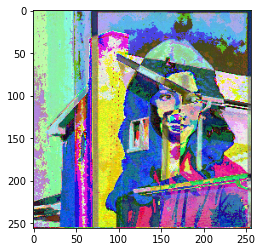

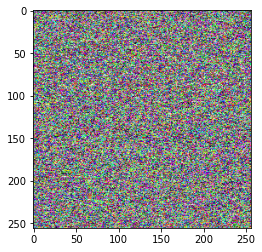

In [152]:
I1 = cv2.imread('4.1.04.tiff')
I2=cv2.imread('4.1.05.tiff')
I3=cv2.bitwise_xor(I1,I2)


E1=cv2.imread('Encrypted_4104.png')
E2=cv2.imread('Encrypted_4105.png')
E3=cv2.bitwise_xor(I1,I2)


E3=cv2.bitwise_xor(E1,E2)

cv2.imwrite(("Original_chosen.png"), I3)
plt.imshow(I3)
plt.show()
cv2.imwrite(("Encrypted_chosen.png"), E3)
plt.imshow(E3)
plt.show()

# npcrv

In [119]:
def rateofchange(height,width,pixel1,pixel2,matrix,i):

    for y in range(0,height):
        for x in range(0,width):
            #print(x,y)
            if pixel1[x,y][i] == pixel2[x,y][i]:
                matrix[x,y]=0
            else:
                matrix[x,y]=1
    return matrix

def sumofpixel(height,width,pixel1,pixel2,ematrix,i):
    matrix=rateofchange(height,width,pixel1,pixel2,ematrix,i)
    psum=0
    for y in range(0,height):
        for x in range(0,width):
            psum=matrix[x,y]+psum
    return psum

def npcrv(loc1,loc2):
    c1 = Image.open(loc1)
    c2 = Image.open(loc2)
    width, height = c1.size
    pixel1 = c1.load()
    pixel2 = c2.load()
    ematrix = np.empty([width, height])
    per=(((sumofpixel(height,width,pixel1,pixel2,ematrix,0)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,1)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,2)/(height*width))*100))/3
    return per

# UACI

In [137]:
def uaci(loc1,loc2):
    image1 = Image.open(loc1)
    image2 = Image.open(loc2)
    pixel1=image1.load()
    pixel2=image2.load()
    width,height=image1.size
    value=0.0
    for y in range(0,height):
        for x in range(0,width):
            value=(abs(pixel1[x,y][0]-pixel2[x,y][0])/255)+value

    value=(value/(width*height))*100
    return value
